In [2]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')
%matplotlib inline

In [18]:
PATH_LINUX = 'data/round-1-island-data-bottle'
path = PATH_LINUX

In [74]:
AMETHYSTS_FAIR_PRICE, STARFRUIT_FAIR_PRICE = 1e4, 5000

In [19]:
round = 1

prices_day_neg2_df = pd.read_csv(filepath_or_buffer = f'{path}/prices_round_{round}_day_-2.csv', index_col='timestamp', sep=';')
prices_day_neg1_df = pd.read_csv(filepath_or_buffer = f'{path}/prices_round_{round}_day_-1.csv', index_col='timestamp', sep=';')
prices_day_0_df = pd.read_csv(filepath_or_buffer = f'{path}/prices_round_{round}_day_0.csv', index_col='timestamp', sep=';')

In [20]:
prices_day_neg2_df.head()

,day,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
timestamp,,,,,,,,,,,,,,,,
0,-2,AMETHYSTS,9996,1,9995.0,25.0,NaN,NaN,10004,1,10005.0,25.0,NaN,NaN,10000.0,0.0
0,-2,STARFRUIT,4997,26,NaN,NaN,NaN,NaN,5003,26,NaN,NaN,NaN,NaN,5000.0,0.0
100,-2,AMETHYSTS,10000,5,9995.0,20.0,NaN,NaN,10005,20,NaN,NaN,NaN,NaN,10002.5,0.0
100,-2,STARFRUIT,5000,5,4998.0,6.0,4997.0,20.0,5004,20,NaN,NaN,NaN,NaN,5002.0,0.0
200,-2,STARFRUIT,4997,1,4996.0,30.0,NaN,NaN,5003,31,NaN,NaN,NaN,NaN,5000.0,0.0


In [91]:
np.array_equal(prices_day_neg2_df.bid_price_1
               , prices_day_neg2_df.bid_price_1.astype(int)), np.array_equal(prices_day_neg1_df.bid_price_1
                                                                             , prices_day_neg1_df.bid_price_1.astype(int)), np.array_equal(prices_day_0_df.bid_price_1
                                                                             , prices_day_0_df.bid_price_1.astype(int))

(True, True, True)

In [92]:
np.array_equal(prices_day_neg2_df.ask_price_1
               , prices_day_neg2_df.ask_price_1.astype(int)), np.array_equal(prices_day_neg1_df.ask_price_1
                                                                             , prices_day_neg1_df.ask_price_1.astype(int)), np.array_equal(prices_day_0_df.ask_price_1
                                                                                                                                           , prices_day_0_df.ask_price_1.astype(int))

(True, True, True)

In [88]:
np.array_equal(prices_day_neg1_df.dropna().bid_price_3, prices_day_neg1_df.bid_price_3.dropna().astype(int))

False

In [86]:
np.array_equal(prices_day_neg2_df.dropna().bid_price_3, prices_day_neg2_df.bid_price_3.dropna().astype(int))

False

### as above, it turns out bid_price_1 and ask_price_1 have integers only

### Plot prices for each product on each trading day

In [40]:
df_amethysts_day_neg2 = prices_day_neg2_df.loc[prices_day_neg2_df['product']=='AMETHYSTS'].rename(columns={'mid_price': 'amethysts_mid_price'})
df_starfruit_day_neg2 = prices_day_neg2_df.loc[prices_day_neg2_df['product']=='STARFRUIT'].rename(columns={'mid_price': 'starfruit_mid_price'})

<Axes: xlabel='timestamp'>

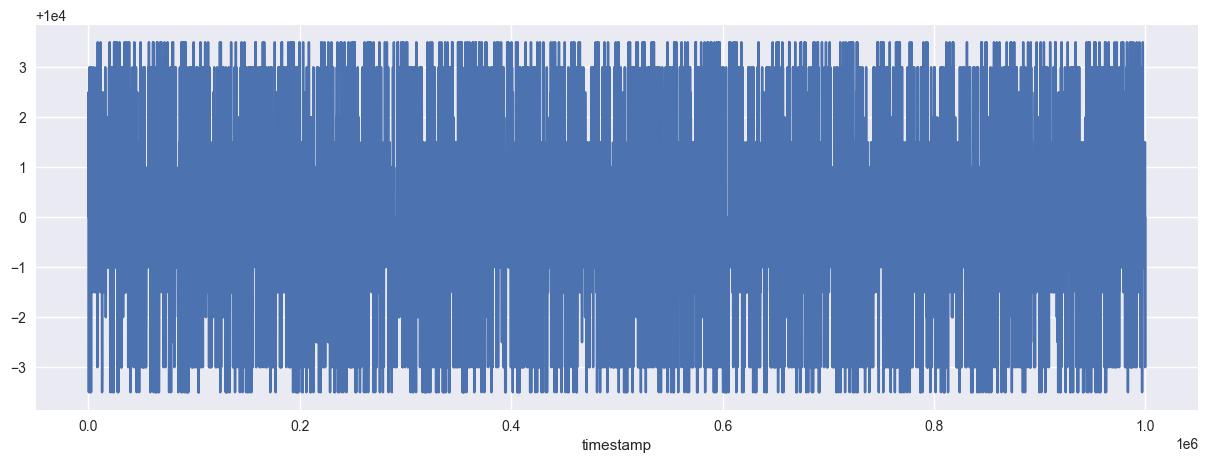

In [41]:
df_amethysts_day_neg2['amethysts_mid_price'].plot(figsize=(15, 5))

<Axes: xlabel='timestamp'>

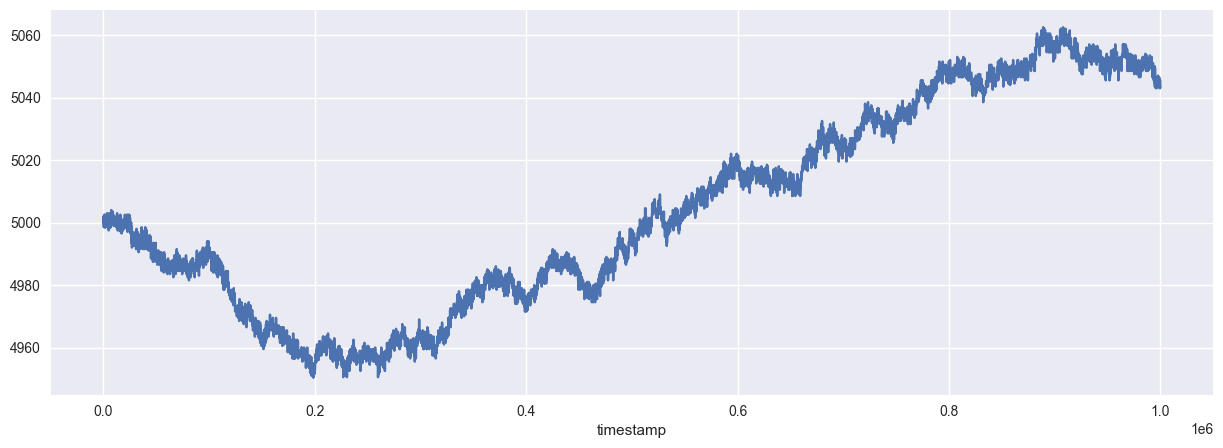

In [42]:
df_starfruit_day_neg2['starfruit_mid_price'].plot(figsize=(15, 5))

In [43]:
df_amethysts_day_neg1 = prices_day_neg1_df.loc[prices_day_neg1_df['product']=='AMETHYSTS'].rename(columns={'mid_price': 'amethysts_mid_price'})
df_starfruit_day_neg1 = prices_day_neg1_df.loc[prices_day_neg1_df['product']=='STARFRUIT'].rename(columns={'mid_price': 'starfruit_mid_price'})

<Axes: xlabel='timestamp'>

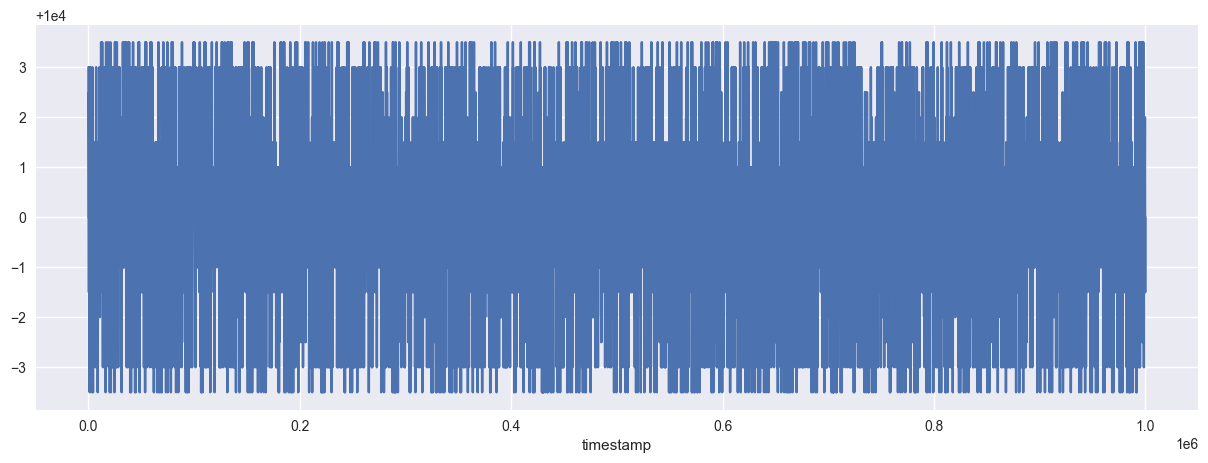

In [44]:
df_amethysts_day_neg1['amethysts_mid_price'].plot(figsize=(15, 5))

<Axes: xlabel='timestamp'>

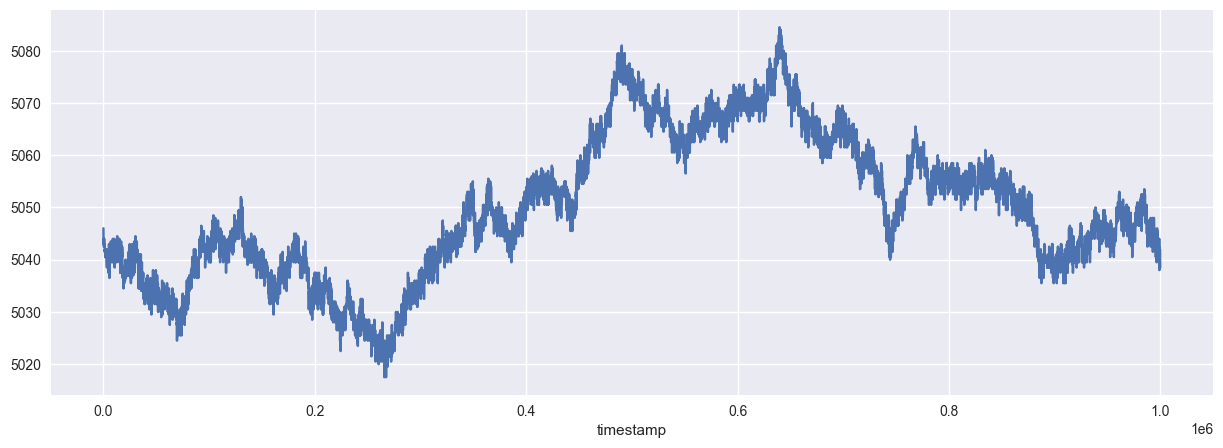

In [45]:
df_starfruit_day_neg1['starfruit_mid_price'].plot(figsize=(15, 5))

In [46]:
df_amethysts_day_0 = prices_day_0_df.loc[prices_day_0_df['product']=='AMETHYSTS'].rename(columns={'mid_price': 'amethysts_mid_price'})
df_starfruit_day_0 = prices_day_0_df.loc[prices_day_0_df['product']=='STARFRUIT'].rename(columns={'mid_price': 'starfruit_mid_price'})

<Axes: xlabel='timestamp'>

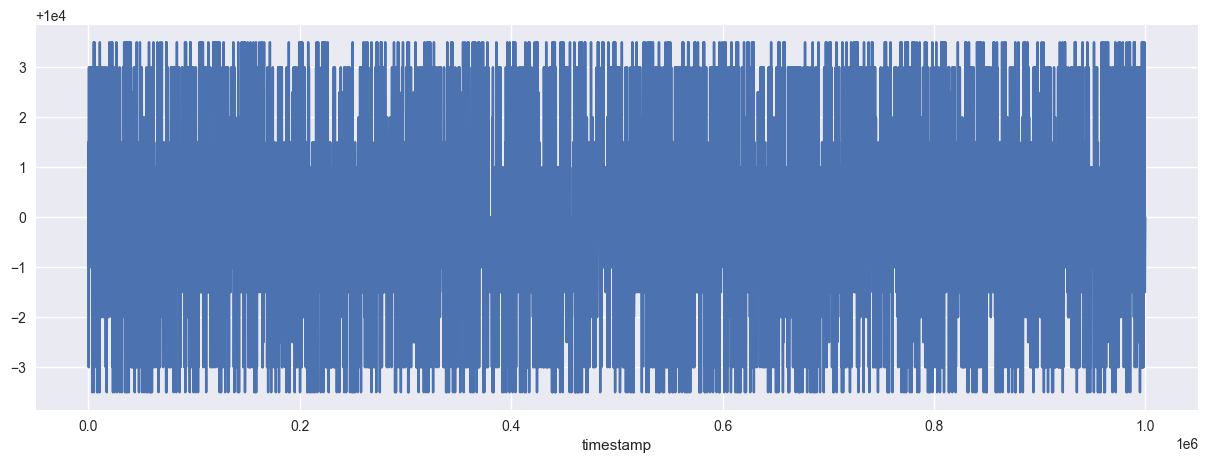

In [47]:
df_amethysts_day_0['amethysts_mid_price'].plot(figsize=(15, 5))

<Axes: xlabel='timestamp'>

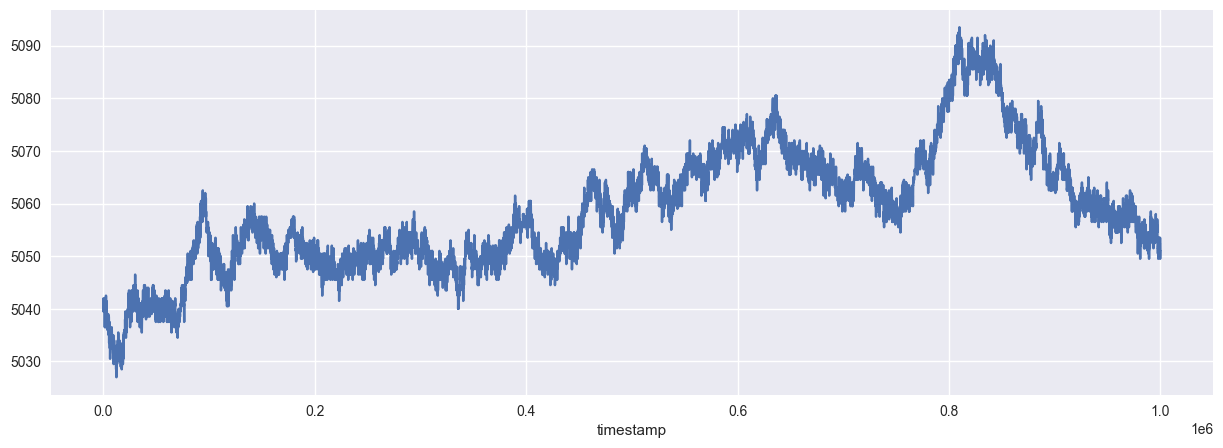

In [48]:
df_starfruit_day_0['starfruit_mid_price'].plot(figsize=(15, 5))

In [50]:
df_amethysts_day_neg2['spread'] = df_amethysts_day_neg2['bid_price_1'] - df_amethysts_day_neg2['ask_price_1']
df_amethysts_day_neg1['spread'] = df_amethysts_day_neg1['bid_price_1'] - df_amethysts_day_neg1['ask_price_1']
df_amethysts_day_0['spread'] = df_amethysts_day_0['bid_price_1'] - df_amethysts_day_0['ask_price_1']

In [54]:
df_amethysts_day_neg2['spread'].describe()

count    10000.000000
mean        -6.728800
std          2.508761
min        -10.000000
25%         -8.000000
50%         -8.000000
75%         -6.000000
max         -2.000000
Name: spread, dtype: float64

In [55]:
df_amethysts_day_neg1['spread'].describe()

count    10000.000000
mean        -6.816000
std          2.460477
min        -10.000000
25%         -8.000000
50%         -8.000000
75%         -6.000000
max         -2.000000
Name: spread, dtype: float64

In [56]:
df_amethysts_day_0['spread'].describe()

count    10000.000000
mean        -6.776700
std          2.470637
min        -10.000000
25%         -8.000000
50%         -8.000000
75%         -6.000000
max         -2.000000
Name: spread, dtype: float64

<Axes: ylabel='Frequency'>

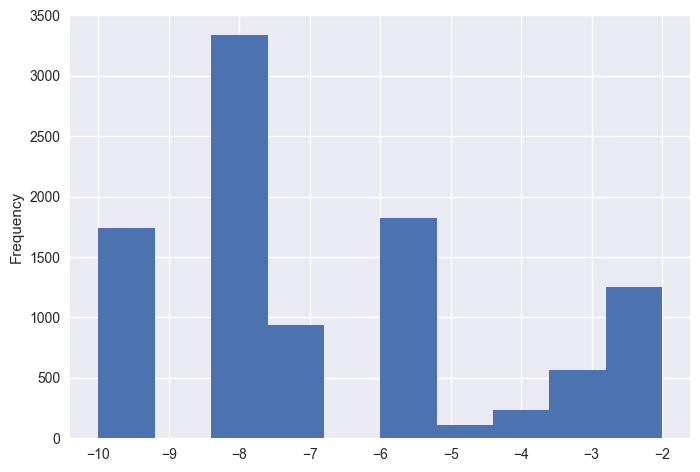

In [57]:
df_amethysts_day_neg2['spread'].plot.hist()

<Axes: ylabel='Frequency'>

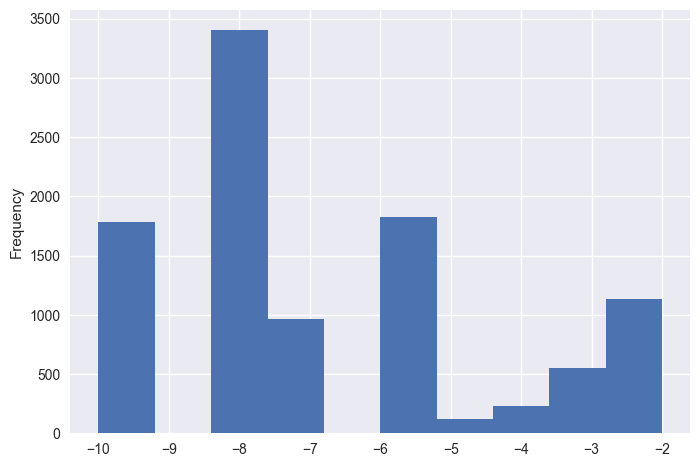

In [58]:
df_amethysts_day_neg1['spread'].plot.hist()

<Axes: ylabel='Frequency'>

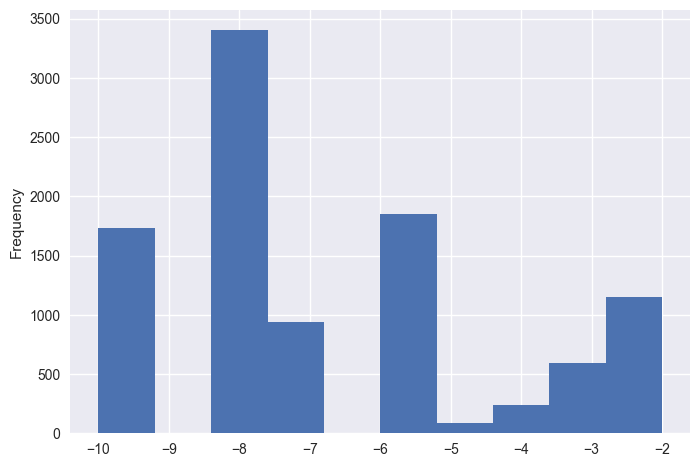

In [59]:
df_amethysts_day_0['spread'].plot.hist()

In [61]:
df_amethysts_day_neg2['bid_price_1'].describe()

count    10000.000000
mean      9996.639100
std          1.968207
min       9995.000000
25%       9995.000000
50%       9996.000000
75%       9998.000000
max      10002.000000
Name: bid_price_1, dtype: float64

<Axes: ylabel='Frequency'>

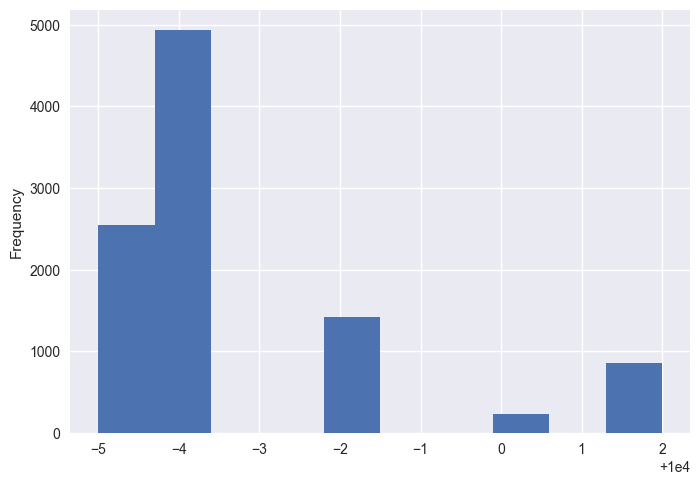

In [60]:
df_amethysts_day_neg2['bid_price_1'].plot.hist()

<Axes: ylabel='Frequency'>

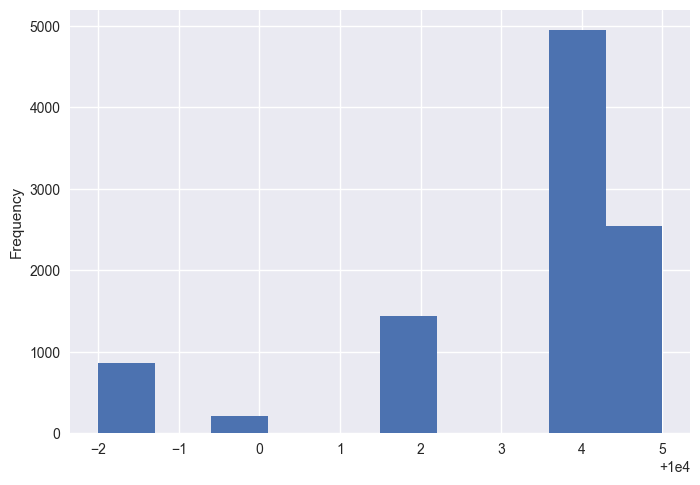

In [62]:
df_amethysts_day_neg2['ask_price_1'].plot.hist()

In [69]:
df_amethysts_day_neg1['bid_price_1'].describe()

count    10000.00000
mean      9996.57840
std          1.90547
min       9995.00000
25%       9995.00000
50%       9996.00000
75%       9996.00000
max      10002.00000
Name: bid_price_1, dtype: float64

<Axes: ylabel='Frequency'>

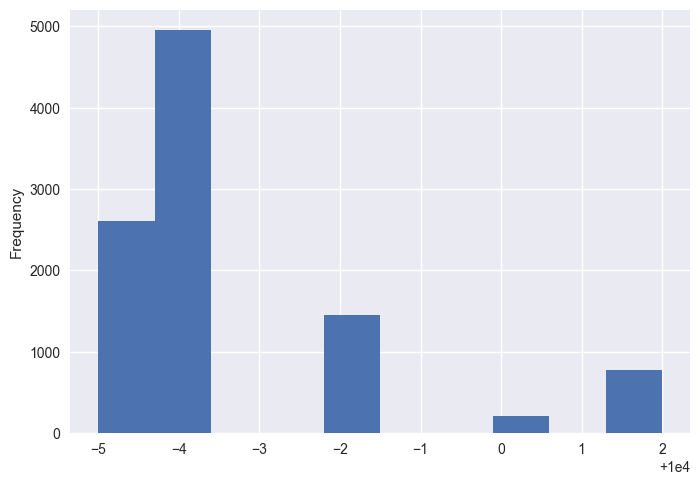

In [63]:
df_amethysts_day_neg1['bid_price_1'].plot.hist()

<Axes: ylabel='Frequency'>

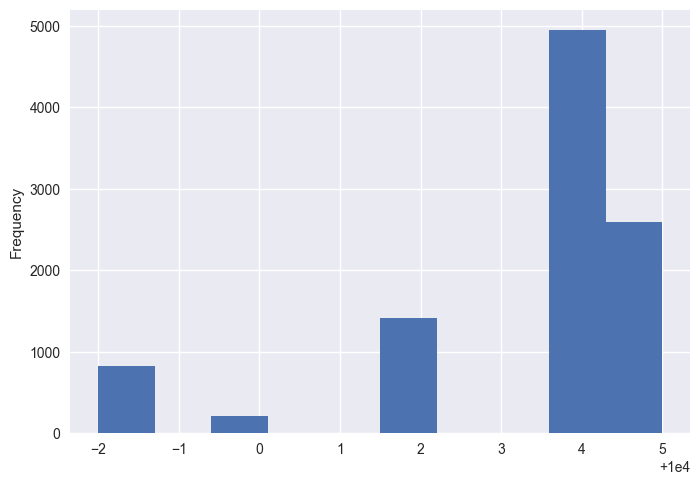

In [64]:
df_amethysts_day_neg1['ask_price_1'].plot.hist()

In [70]:
df_amethysts_day_0['bid_price_1'].describe()

count    10000.000000
mean      9996.611400
std          1.939115
min       9995.000000
25%       9995.000000
50%       9996.000000
75%       9996.000000
max      10002.000000
Name: bid_price_1, dtype: float64

<Axes: ylabel='Frequency'>

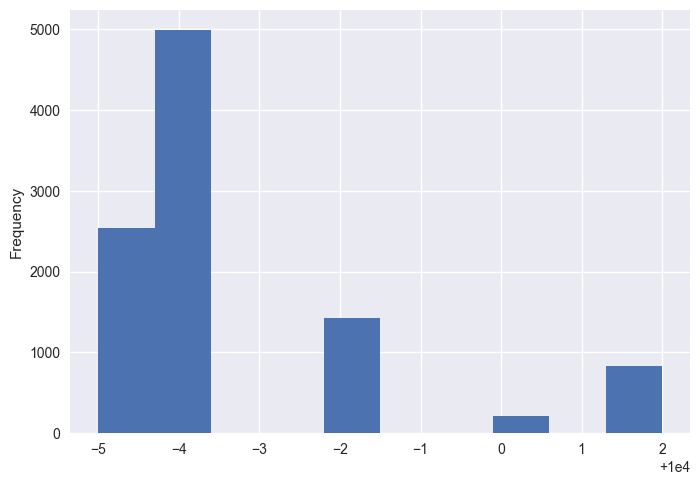

In [67]:
df_amethysts_day_0['bid_price_1'].plot.hist()

<Axes: ylabel='Frequency'>

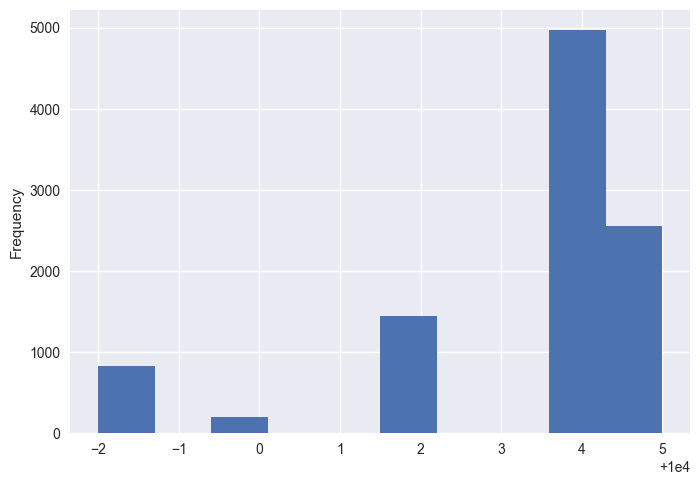

In [68]:
df_amethysts_day_0['ask_price_1'].plot.hist()

In [79]:
len(df_amethysts_day_0[df_amethysts_day_0.bid_price_1>AMETHYSTS_FAIR_PRICE]) / len(df_amethysts_day_0), len(df_amethysts_day_0[df_amethysts_day_0.ask_price_1<AMETHYSTS_FAIR_PRICE]) / len(df_amethysts_day_0)

(0.0825, 0.0831)

In [80]:
len(df_amethysts_day_0[(df_amethysts_day_0.bid_price_1>AMETHYSTS_FAIR_PRICE) | (df_amethysts_day_0.ask_price_1<AMETHYSTS_FAIR_PRICE)]) / len(df_amethysts_day_0)

0.1656


### as shown above, in most timestamps, the best bid is quite below the fair price(10000), whereas most of the best ask is quite above fair price
### however in about 8.2% of timestamps  best bid > fair price; in about another 8.3% of timestamps  best ask < fair price
### strategy: take the market order: buy the best ask and sell with the max of(fair price, the best bid) 
### (or sell the best bid, and buy with the min of(fair price, the best ask))
### need to handle the position limit accordingly, make adjust down the fair price to reduce inventory in order to switch to more profitable trades(todo later)

In [96]:
len(df_amethysts_day_0[(df_amethysts_day_0.bid_price_1>AMETHYSTS_FAIR_PRICE)]) / len(df_amethysts_day_0), len(df_amethysts_day_0[(df_amethysts_day_0.bid_price_1>AMETHYSTS_FAIR_PRICE) | (df_amethysts_day_0.spread>=-6)]) / len(df_amethysts_day_0)

(0.0825, 0.3921)

In [200]:
df_amethysts_day_0['bid_price_1'].describe()

count    10000.000000
mean      9996.611400
std          1.939115
min       9995.000000
25%       9995.000000
50%       9996.000000
75%       9996.000000
max      10002.000000
Name: bid_price_1, dtype: float64

In [202]:
df_amethysts_day_0['ask_price_1'].describe()

count    10000.000000
mean     10003.388100
std          1.941457
min       9998.000000
25%      10004.000000
50%      10004.000000
75%      10005.000000
max      10005.000000
Name: ask_price_1, dtype: float64

In [102]:
df_amethysts_day_0[df_amethysts_day_0.spread<=-6]['bid_price_1'].describe()

count    7934.000000
mean     9996.072977
std         0.987553
min      9995.000000
25%      9995.000000
50%      9996.000000
75%      9996.000000
max      9998.000000
Name: bid_price_1, dtype: float64

In [103]:
df_amethysts_day_0[df_amethysts_day_0.spread<=-6]['ask_price_1'].describe()

count     7934.000000
mean     10003.925132
std          0.988751
min      10002.000000
25%      10004.000000
50%      10004.000000
75%      10005.000000
max      10005.000000
Name: ask_price_1, dtype: float64

In [104]:
df_amethysts_day_0['ask_price_1'].describe()

count    10000.000000
mean     10003.388100
std          1.941457
min       9998.000000
25%      10004.000000
50%      10004.000000
75%      10005.000000
max      10005.000000
Name: ask_price_1, dtype: float64

### as shown above, there is a consistent wide spread(of -6, -7, -8, -9, -10) between the best bid and best ask(~39% of timestamps)
### strategy: if the spread is wide(<=-7, roughly mean of the spread for each day), take the best bid if it has a larger gap than the best ask and sell with the best ask -1 to beat other ask prices; The trades happen when there is a sudden order to make the spread much smaller;
### the threshold -6 may be adjusted based on the real market(e.g. max(abs(rolling 500D median of spread), 2), if the median spread is <2, don't do market making>)
### need to handle the position limit accordingly, make adjust down the fair price to reduce inventory in order to switch to more profitable trades(todo later)

In [124]:
df_amethysts_day_0.head(2)

,day,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,amethysts_mid_price,profit_and_loss,spread,best_bid_best_ask_vol_diff,best_bid_best_ask_vol_sum
timestamp,,,,,,,,,,,,,,,,,,,
0,0,AMETHYSTS,9998,1,9995.0,30.0,NaN,NaN,10005,30,NaN,NaN,NaN,NaN,10001.5,0.0,-7,29,31
100,0,AMETHYSTS,9996,1,9995.0,30.0,NaN,NaN,10002,6,10004.0,1.0,10005.0,30.0,9999.0,0.0,-6,5,7


In [123]:
df_amethysts_day_0['best_bid_best_ask_vol_diff'] = abs(df_amethysts_day_0['bid_volume_1'] - df_amethysts_day_0['ask_volume_1'])
df_amethysts_day_0['best_bid_best_ask_vol_sum'] = df_amethysts_day_0['bid_volume_1'] + df_amethysts_day_0['ask_volume_1']

In [140]:
df_amethysts_day_0['best_bid_best_ask_vol_diff'].corr(df_amethysts_day_0['amethysts_mid_price'])

0.008836871741456954

In [141]:
df_amethysts_day_0['best_bid_best_ask_vol_diff'].corr(df_amethysts_day_0['spread'])

0.3452307087476432

In [142]:
abs(df_amethysts_day_0['bid_volume_2'].fillna(0) - df_amethysts_day_0['ask_volume_2'].fillna(0)).corr(df_amethysts_day_0['amethysts_mid_price'])

-0.0013957247132635772

In [143]:
abs(df_amethysts_day_0['bid_volume_3'].fillna(0) - df_amethysts_day_0['ask_volume_3'].fillna(0)).corr(df_amethysts_day_0['amethysts_mid_price'])

-0.007674134468701898

In [144]:
df_amethysts_day_0['best_bid_best_ask_vol_sum'].corr(df_amethysts_day_0['amethysts_mid_price'])

0.005482005687846771

In [147]:
df_amethysts_day_0['best_bid_best_ask_vol_sum'].corr(df_amethysts_day_0['spread'])

-0.43387034874101693

In [145]:
(df_amethysts_day_0['bid_volume_2'].fillna(0) + df_amethysts_day_0['ask_volume_2'].fillna(0)).corr(df_amethysts_day_0['amethysts_mid_price'])

0.0008154699298002035

In [146]:
(df_amethysts_day_0['bid_volume_3'].fillna(0) + df_amethysts_day_0['ask_volume_3'].fillna(0)).corr(df_amethysts_day_0['amethysts_mid_price'])

-0.008067838560585535

In [152]:
abs(df_amethysts_day_neg2['bid_volume_1'].fillna(0) - df_amethysts_day_neg2['ask_volume_1'].fillna(0)).corr(df_amethysts_day_neg2['amethysts_mid_price'])

0.011722208924595188

In [153]:
abs(df_amethysts_day_neg1['bid_volume_1'].fillna(0) - df_amethysts_day_neg1['ask_volume_1'].fillna(0)).corr(df_amethysts_day_neg1['amethysts_mid_price'])

-0.011721898239716541

In [150]:
(df_amethysts_day_neg2['bid_volume_1'].fillna(0) + df_amethysts_day_neg2['ask_volume_1'].fillna(0)).corr(df_amethysts_day_neg2['amethysts_mid_price'])

0.0030355037623429806

In [151]:
(df_amethysts_day_neg1['bid_volume_1'].fillna(0) + df_amethysts_day_neg1['ask_volume_1'].fillna(0)).corr(df_amethysts_day_neg1['amethysts_mid_price'])

-0.0016249404068518724

In [157]:
abs(df_amethysts_day_neg2['bid_volume_1'].fillna(0) - df_amethysts_day_neg2['ask_volume_1'].fillna(0)).corr(df_amethysts_day_neg2['spread']), \
abs(df_amethysts_day_neg1['bid_volume_1'].fillna(0) - df_amethysts_day_neg1['ask_volume_1'].fillna(0)).corr(df_amethysts_day_neg1['spread'])

(0.33063150705937105, 0.3443031877867391)

In [158]:
(df_amethysts_day_neg2['bid_volume_1'].fillna(0) + df_amethysts_day_neg2['ask_volume_1'].fillna(0)).corr(df_amethysts_day_neg2['spread']), \
(df_amethysts_day_neg1['bid_volume_1'].fillna(0) + df_amethysts_day_neg1['ask_volume_1'].fillna(0)).corr(df_amethysts_day_neg1['spread'])

(-0.4411986469789182, -0.4423373216797492)

### same findings for day -2 and day -1 as day 0

### as above, the only thing with strong correlations are the sum of best bid vol and best ask vol vs spread, which matches common sense(spreads are lower if the trading volumes are higher)
### no idea how to incorporate into the strategy though

### starfruit starts below

In [105]:
df_starfruit_day_neg2['spread'] = df_starfruit_day_neg2['bid_price_1'] - df_starfruit_day_neg2['ask_price_1']
df_starfruit_day_neg1['spread'] = df_starfruit_day_neg1['bid_price_1'] - df_starfruit_day_neg1['ask_price_1']
df_starfruit_day_0['spread'] = df_starfruit_day_0['bid_price_1'] - df_starfruit_day_0['ask_price_1']

<Axes: ylabel='Frequency'>

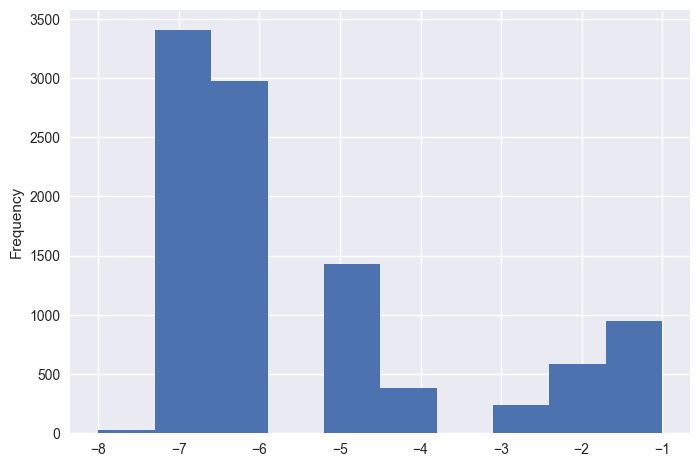

In [106]:
df_starfruit_day_neg2['spread'].plot.hist()

<Axes: ylabel='Frequency'>

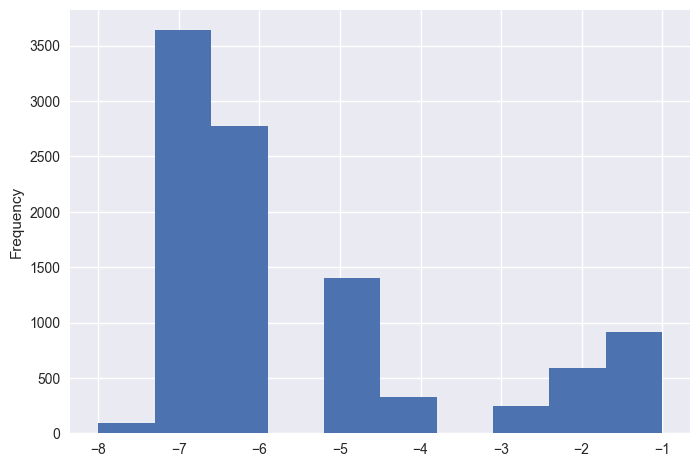

In [107]:
df_starfruit_day_neg1['spread'].plot.hist()

<Axes: ylabel='Frequency'>

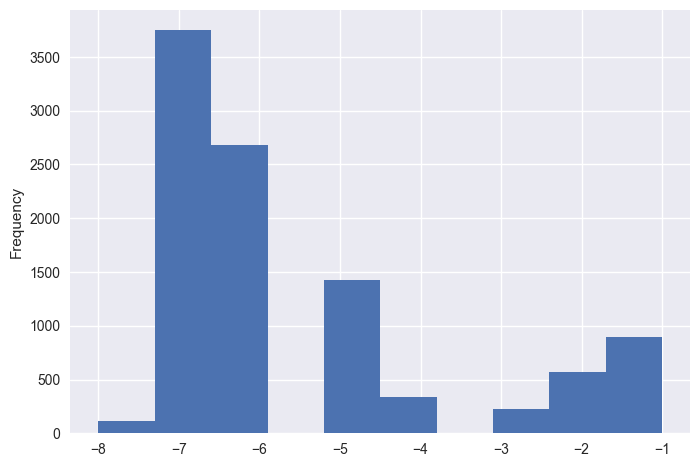

In [108]:
df_starfruit_day_0['spread'].plot.hist()

In [197]:
df_starfruit_day_neg2['spread'].describe()

count    10000.000000
mean        -5.346400
std          1.935247
min         -8.000000
25%         -7.000000
50%         -6.000000
75%         -5.000000
max         -1.000000
Name: spread, dtype: float64

In [199]:
df_starfruit_day_neg1['spread'].describe()

count    10000.000000
mean        -5.408700
std          1.942174
min         -8.000000
25%         -7.000000
50%         -6.000000
75%         -5.000000
max         -1.000000
Name: spread, dtype: float64

In [198]:
df_starfruit_day_0['spread'].describe()

count    10000.000000
mean        -5.443700
std          1.933237
min         -8.000000
25%         -7.000000
50%         -6.000000
75%         -5.000000
max         -1.000000
Name: spread, dtype: float64

In [119]:
df_amethysts_day_neg2['amethysts_mid_price'].pct_change().apply(lambda x: np.log(1 + x)).std(), \
df_amethysts_day_neg1['amethysts_mid_price'].pct_change().apply(lambda x: np.log(1 + x)).std()

(0.00021315124096776386, 0.00020806075170988914)

In [118]:
df_amethysts_day_0['amethysts_mid_price'].pct_change().apply(lambda x: np.log(1 + x)).std()

0.0002124221583609858

In [114]:
df_starfruit_day_neg2['starfruit_mid_price'].pct_change().apply(lambda x: np.log(1 + x)).std(), \
df_starfruit_day_neg1['starfruit_mid_price'].pct_change().apply(lambda x: np.log(1 + x)).std()

(0.0003413195029548471, 0.00033616589626243035)

In [115]:
#df_starfruit_day_0['log_return'] = df_starfruit_day_0['starfruit_mid_price'].pct_change().apply(lambda x: pd.np.log(1 + x))

# Calculate standard deviation of log returns
log_return_std_starfruit_day_0 = df_starfruit_day_0['starfruit_mid_price'].pct_change().apply(lambda x: np.log(1 + x)).std()

In [116]:
log_return_std_starfruit_day_0

0.0003320138208008681

### starfruit has higher volatility than amethysts however their std are both small;
### starfruit has similar spread of amethysts based on hist plot of spread
### also given that both products have position limit of only 20, it could indicate we should use a market-making strategy for both products(instead of risk taking)

### the spread of starfruit has similar distribution as amethysts, we could use a similar market-making strategy for both to begin
### The trades happen when there is a sudden order to make the spread much smaller;
### take the best ask if it has a larger gap than the best bid. 

In [161]:
abs(df_starfruit_day_neg2['bid_volume_1'].fillna(0) 
    - df_starfruit_day_neg2['ask_volume_1'].fillna(0)).corr(df_starfruit_day_neg2['starfruit_mid_price']), \
abs(df_starfruit_day_neg1['bid_volume_1'].fillna(0) 
    - df_starfruit_day_neg1['ask_volume_1'].fillna(0)).corr(df_starfruit_day_neg1['starfruit_mid_price']), \
abs(df_starfruit_day_0['bid_volume_1'].fillna(0) 
    - df_starfruit_day_0['ask_volume_1'].fillna(0)).corr(df_starfruit_day_0['starfruit_mid_price'])

(-0.03611342376100853, -0.03113803345717978, -0.002236068085828705)

In [162]:
(df_starfruit_day_neg2['bid_volume_1'].fillna(0) 
    + df_starfruit_day_neg2['ask_volume_1'].fillna(0)).corr(df_starfruit_day_neg2['starfruit_mid_price']), \
(df_starfruit_day_neg1['bid_volume_1'].fillna(0) 
    + df_starfruit_day_neg1['ask_volume_1'].fillna(0)).corr(df_starfruit_day_neg1['starfruit_mid_price']), \
(df_starfruit_day_0['bid_volume_1'].fillna(0) 
    + df_starfruit_day_0['ask_volume_1'].fillna(0)).corr(df_starfruit_day_0['starfruit_mid_price'])

(0.011472593787539743, -0.015054649210974349, -0.011567107891323494)

In [163]:
abs(df_starfruit_day_neg2['bid_volume_1'].fillna(0) 
    - df_starfruit_day_neg2['ask_volume_1'].fillna(0)).corr(df_starfruit_day_neg2['spread']), \
abs(df_starfruit_day_neg1['bid_volume_1'].fillna(0) 
    - df_starfruit_day_neg1['ask_volume_1'].fillna(0)).corr(df_starfruit_day_neg1['spread']), \
abs(df_starfruit_day_0['bid_volume_1'].fillna(0) 
    - df_starfruit_day_0['ask_volume_1'].fillna(0)).corr(df_starfruit_day_0['spread'])

(0.4288664939959211, 0.47373600551032635, 0.4846183427401658)

In [165]:
(df_starfruit_day_neg2['bid_volume_1'].fillna(0) 
    + df_starfruit_day_neg2['ask_volume_1'].fillna(0)).corr(df_starfruit_day_neg2['spread']), \
(df_starfruit_day_neg1['bid_volume_1'].fillna(0) 
    + df_starfruit_day_neg1['ask_volume_1'].fillna(0)).corr(df_starfruit_day_neg1['spread']), \
(df_starfruit_day_0['bid_volume_1'].fillna(0) 
    + df_starfruit_day_0['ask_volume_1'].fillna(0)).corr(df_starfruit_day_0['spread'])

(-0.6054895133693529, -0.5798256294011108, -0.5859831673181571)

### same as amethysts, the only thing with strong correlations are the sum/diff of best bid vol and best ask vol vs spread

### Calculate the plot MA-10, MA-20, MA-50, MA-100 and overlap with prices

In [166]:
df_starfruit_day_neg2['mid_price_MA10'] = df_starfruit_day_neg2['starfruit_mid_price'].rolling(window=10).mean()
df_starfruit_day_neg2['mid_price_MA20'] = df_starfruit_day_neg2['starfruit_mid_price'].rolling(window=20).mean()
df_starfruit_day_neg2['mid_price_MA50'] = df_starfruit_day_neg2['starfruit_mid_price'].rolling(window=50).mean()
df_starfruit_day_neg2['mid_price_MA100'] = df_starfruit_day_neg2['starfruit_mid_price'].rolling(window=100).mean()

<Axes: xlabel='timestamp'>

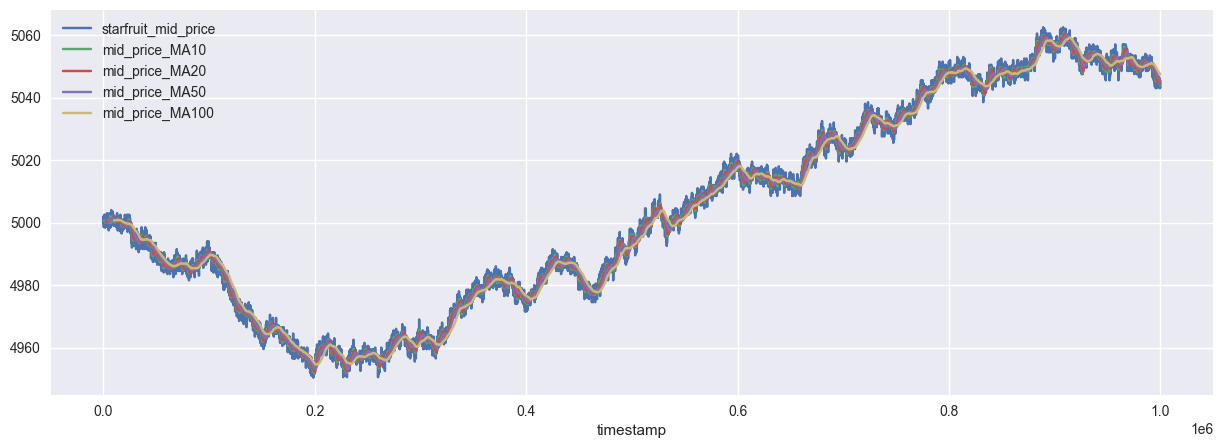

In [168]:
df_starfruit_day_neg2[['starfruit_mid_price', 'mid_price_MA10', 'mid_price_MA20', 'mid_price_MA50', 'mid_price_MA100']].plot(figsize=(15, 5))

In [169]:
df_starfruit_day_neg2['MA20_above_MA50'] = df_starfruit_day_neg2['mid_price_MA20'] > df_starfruit_day_neg2['mid_price_MA50'] 

In [ ]:
#df_starfruit_day_neg2['long_MA20_above_MA50'] = df_starfruit_day_neg2['MA20_above_MA50'].shift(1)

In [176]:
df_starfruit_day_neg2['long_signal_MA20_above_MA50'] = df_starfruit_day_neg2['MA20_above_MA50'].astype(int).shift(1)

In [187]:
len(df_starfruit_day_neg2[df_starfruit_day_neg2['long_signal_MA20_above_MA50']==1])  / len(df_starfruit_day_neg2)

0.5113

In [195]:
#df_starfruit_day_neg2['long_signal_MA20_above_MA100'] = 
(df_starfruit_day_neg2['mid_price_MA20'] > df_starfruit_day_neg2['mid_price_MA50']).astype(int).shift(1).sum(), \
(df_starfruit_day_neg2['mid_price_MA10'] > df_starfruit_day_neg2['mid_price_MA50']).astype(int).shift(1).sum(), \
(df_starfruit_day_neg2['mid_price_MA20'] > df_starfruit_day_neg2['mid_price_MA100']).astype(int).shift(1).sum() 

(5113.0, 5042.0, 5104.0)

In [196]:
len(df_starfruit_day_neg2)

10000

### no obvious differences for these MAs, too many trading signals which means we couldn't use it for a MA-based strategy

Text(0, 0.5, 'Price')

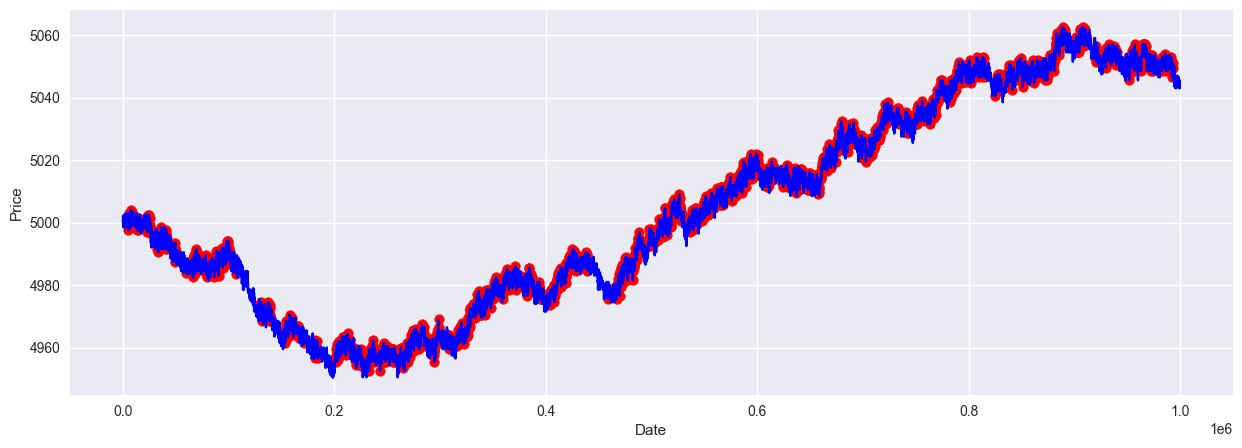

In [182]:
#df_starfruit_day_neg2[['starfruit_mid_price', 'long_signal_MA20_above_MA50']].plot(figsize=(15, 5))
fig = plt.figure(figsize=(15, 5))
plt.plot(df_starfruit_day_neg2.index, df_starfruit_day_neg2['starfruit_mid_price'], color='blue', label='Price')

# Plot trading signals where the signal equals 1
signal_dates = df_starfruit_day_neg2[df_starfruit_day_neg2['long_signal_MA20_above_MA50'] == 1].index
signal_prices = df_starfruit_day_neg2[df_starfruit_day_neg2['long_signal_MA20_above_MA50'] == 1].starfruit_mid_price
plt.scatter(signal_dates, signal_prices, color='red', label='Signal', marker='o')

# Set plot labels and legend
plt.xlabel('Date')
plt.ylabel('Price')